# FAI hw 03

최재필

In [1]:
import numpy as np

## Q1. 

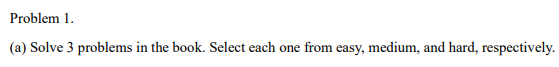

### Easy

9.1

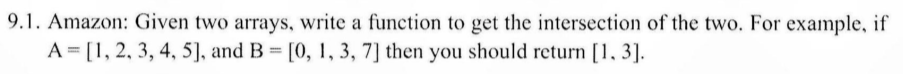

In [2]:
# Assuming order is not important

def get_intersection(A, B):
    return list(set(A) & set(B))

In [3]:
A = [1, 2, 3, 4, 5]
B = [0, 1, 3, 7]

get_intersection(A, B)

[1, 3]

time complexity: O(min(n, m))

In [4]:
# without using set & order matters

def get_intersection(A, B):
    return [x for x in A if x in B]

In [5]:
A = [1, 2, 3, 4, 5]
B = [0, 1, 3, 7]

get_intersection(A, B)

[1, 3]

time complexity: O(n * m)

### Medium

9.7

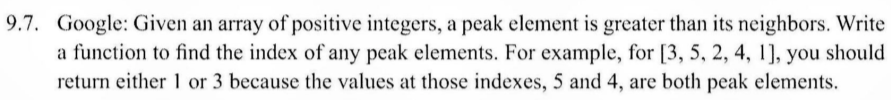

1st try: 

- 한 번에 3개씩 iterative

In [3]:
test1 = [3, 5, 2, 4, 1]

In [1]:
def get_peaks(li):
    peaks = []
    for one, two, three in zip(li, li[1:], li[2:]):
        if one < two > three:
            peaks.append(two)
    
    return peaks

In [4]:
get_peaks(test1)

[5, 4]

2nd try: 
- 2번째가 peak이면 1번째, 3번째는 분명히 peak이 아니다. 검사할 필요가 없다. 
- 1st try에선 모든걸 iterative하게 보고 있어서 비효율적이다. 

### Hard

9.25

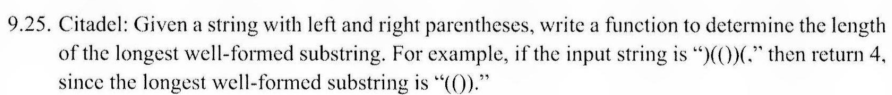

## Q2.

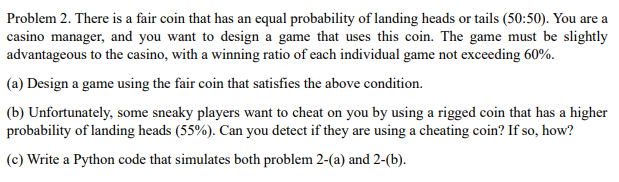